## 1.A. Wavelet Denoising Analysis (New Section)

This section explores the effect of wavelet denoising on the input data and provides methods to visualize and compare different denoising configurations.

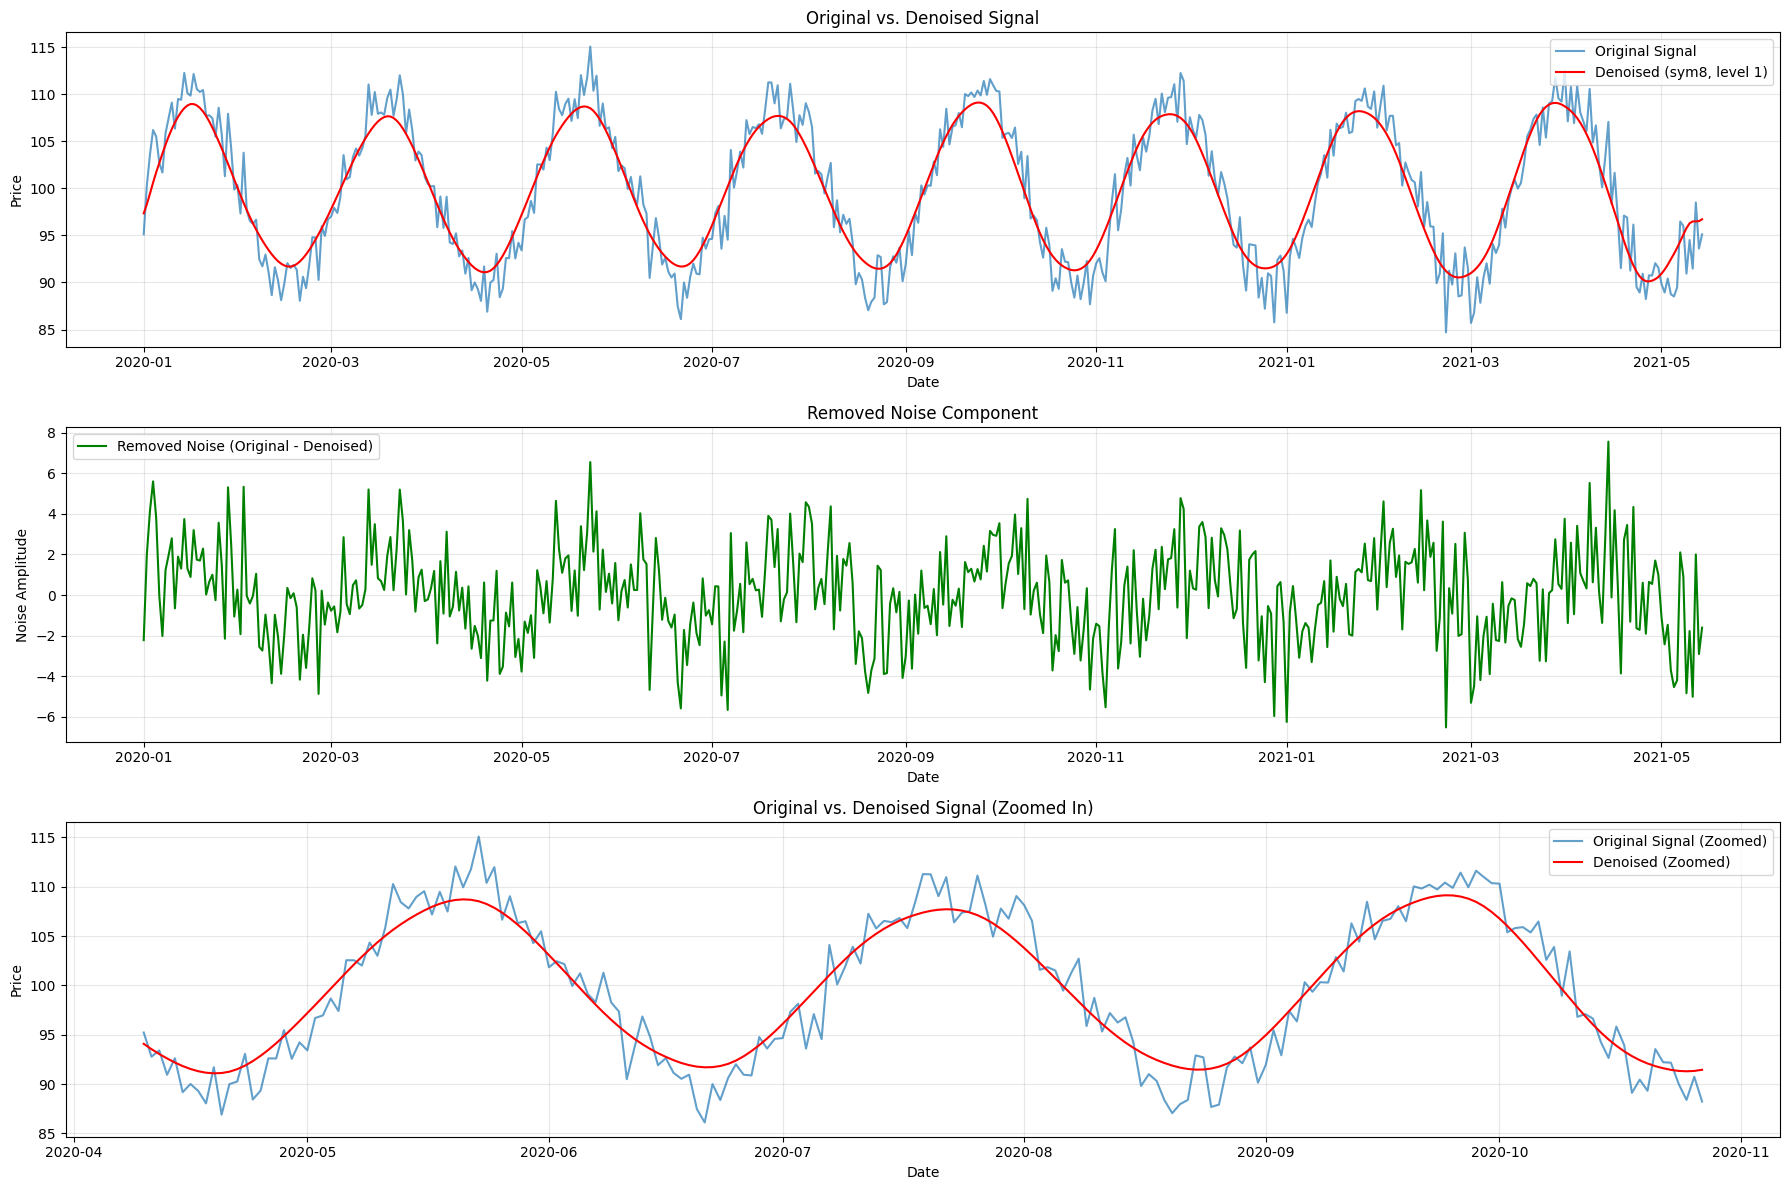

In [1]:
import matplotlib.pyplot as plt # Added this import
from sklearn.metrics import mean_squared_error # Added this import
from scripts.preprocess import wavelet_denoise # Import the denoising function
import pywt # For listing available wavelets

# Assume TARGET_COL and load_data() are defined elsewhere or passed in
# For demonstration, let's mock them if they are not globally available in your environment
TARGET_COL = 'Close' # Example target column

def load_data():
    # This is a placeholder. Replace with your actual data loading logic.
    # For example, loading from a CSV or a pandas DataFrame.
    import pandas as pd
    import numpy as np
    dates = pd.to_datetime(pd.date_range(start='2020-01-01', periods=500, freq='D'))
    data = np.sin(np.linspace(0, 50, 500)) * 10 + np.random.randn(500) * 2 + 100
    df_mock = pd.DataFrame({TARGET_COL: data}, index=dates)
    return df_mock


# Let's take a sample of the 'Close' price from the original dataframe for visualization
if 'df' not in locals(): # Ensure df is loaded
    df = load_data()

sample_series_original = df[TARGET_COL].dropna().copy()

# Apply wavelet denoising with a default configuration (e.g., sym8, level 1 as in preprocess.py)
sample_series_denoised_default = wavelet_denoise(sample_series_original, wavelet='sym8', level=1)

# Calculate the removed noise
removed_noise_default = sample_series_original.loc[sample_series_denoised_default.index] - sample_series_denoised_default

# Plot original vs. denoised
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(sample_series_original.index, sample_series_original, label='Original Signal', alpha=0.7)
plt.plot(sample_series_denoised_default.index, sample_series_denoised_default, label='Denoised (sym8, level 1)', color='red')
plt.title('Original vs. Denoised Signal')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(removed_noise_default.index, removed_noise_default, label='Removed Noise (Original - Denoised)', color='green')
plt.title('Removed Noise Component')
plt.xlabel('Date')
plt.ylabel('Noise Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

# Zoom in on a portion to see details
zoom_slice = slice(sample_series_original.index[100], sample_series_original.index[300]) # Adjust slice as needed
plt.subplot(3, 1, 3)
plt.plot(sample_series_original.loc[zoom_slice].index, sample_series_original.loc[zoom_slice], label='Original Signal (Zoomed)', alpha=0.7)
plt.plot(sample_series_denoised_default.loc[zoom_slice].index, sample_series_denoised_default.loc[zoom_slice], label='Denoised (Zoomed)', color='red')
plt.title('Original vs. Denoised Signal (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Comparing Different Wavelet Configurations

We can test various wavelets and decomposition levels to see their impact.

Available wavelet families: ['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']
Wavelets in 'db' family: ['db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38']
Wavelets in 'sym' family: ['sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']
Wavelets in 'coif' family: ['coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16'

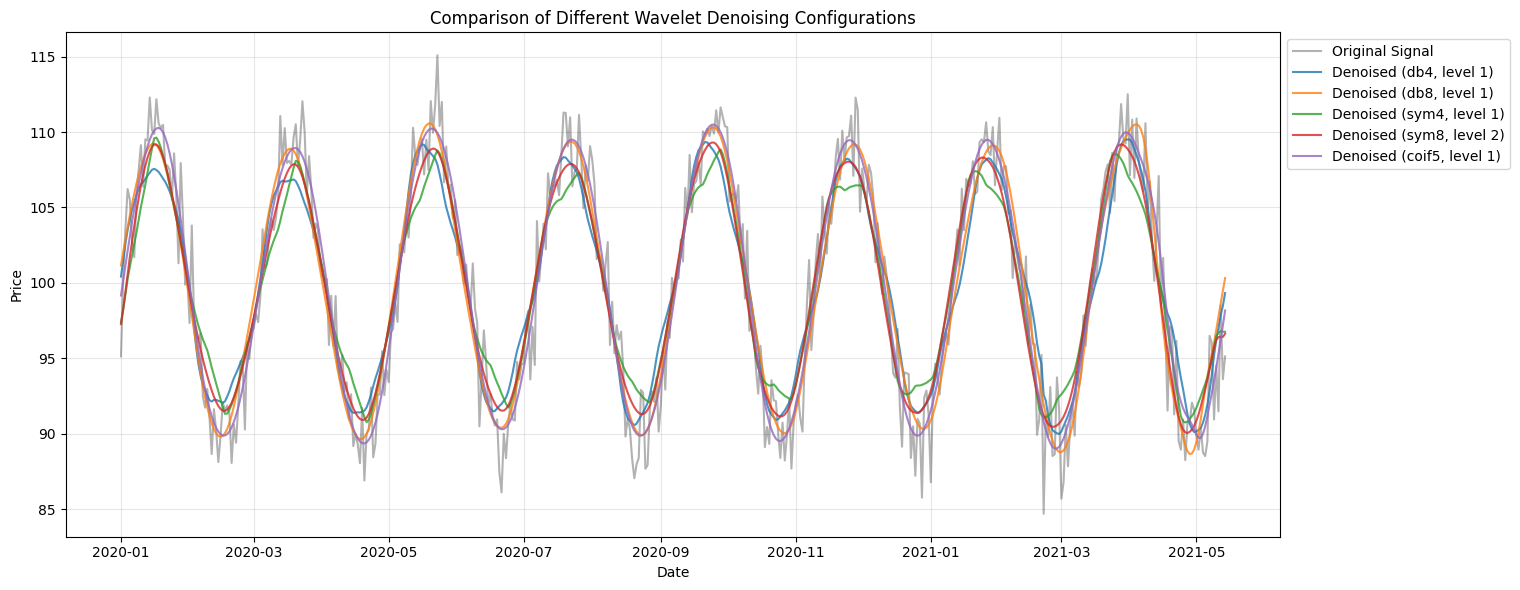

In [2]:
# List some available wavelets
print("Available wavelet families:", pywt.families(short=False))
print("Wavelets in 'db' family:", pywt.wavelist(family='db', kind='discrete'))
print("Wavelets in 'sym' family:", pywt.wavelist(family='sym', kind='discrete'))
print("Wavelets in 'coif' family:", pywt.wavelist(family='coif', kind='discrete'))

# Configurations to test: (wavelet, level)
configs_to_test = [
    ('db4', 1),
    ('db8', 1),
    ('sym4', 1),
    ('sym8', 2), # Different level
    ('coif5', 1)
]

plt.figure(figsize=(18, 6))
plt.plot(sample_series_original.index, sample_series_original, label='Original Signal', alpha=0.3, color='black')

for wavelet_type, decomp_level in configs_to_test:
    try:
        denoised_series = wavelet_denoise(sample_series_original, wavelet=wavelet_type, level=decomp_level)
        plt.plot(denoised_series.index, denoised_series, label=f'Denoised ({wavelet_type}, level {decomp_level})', alpha=0.8)
    except Exception as e:
        print(f"Could not denoise with {wavelet_type}, level {decomp_level}: {e}")

plt.title('Comparison of Different Wavelet Denoising Configurations')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True, alpha=0.3)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.show()

### How to Evaluate "Better" Denoising

Choosing the optimal denoising parameters is not always straightforward and can be task-dependent. Here are a few approaches:

1.  Visual Inspection:
    * Does the denoised signal look smoother while retaining important characteristics (peaks, troughs, overall trend)?
    * Is too much detail lost (over-smoothing) or is there still a lot of noise (under-smoothing)?

2.  Quantitative Metrics (Indirect):
    * Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) between original and denoised signal: A lower value means the denoised signal is closer to the original. This can be a double-edged sword: too low might mean not enough noise was removed. It's a measure of how much the signal was altered.
    * Variance of the removed noise: Higher variance might indicate more noise was captured and removed. Compare this to the variance of the original signal.
    * Signal-to-Noise Ratio (SNR): If you had a hypothetical "clean" signal, you could calculate SNR. In practice, this is difficult for real-world financial data. One proxy could be variance(denoised_signal) / variance(removed_noise).

3.  Impact on Downstream Model Performance (Most Important):
    * The most crucial test is to see how different denoising configurations affect the performance of your LSTM and CNN models.
    * Methodology:
        1.  Create several versions of your preprocessed dataset, each using a different wavelet configuration for denoising all relevant features.
        2.  Train your LSTM and CNN models on each of these denoised datasets.
        3.  Evaluate the models on a consistent validation/test set.
        4.  Compare metrics like R², MSE, MAE, and even the trading simulation results.
    * The configuration that leads to the best predictive performance on unseen data is likely the most suitable for your specific task.
    * This is computationally more intensive as it requires retraining models but provides the most practical evaluation.

4.  Stationarity Tests: Check if denoising affects the stationarity of the series (e.g., using ADF test). Sometimes denoising can help stabilize variance.

Example: Calculating MSE between original and denoised

In [3]:
mse_values = {}
for wavelet_type, decomp_level in configs_to_test:
    try:
        denoised_series = wavelet_denoise(sample_series_original, wavelet=wavelet_type, level=decomp_level)
        # Ensure indices align for MSE calculation
        common_index = sample_series_original.index.intersection(denoised_series.index)
        original_common = sample_series_original.loc[common_index]
        denoised_common = denoised_series.loc[common_index]
        
        mse = mean_squared_error(original_common, denoised_common)
        mse_values[f'{wavelet_type}_level{decomp_level}'] = mse
        print(f"MSE for {wavelet_type}, level {decomp_level}: {mse:.4f}")
    except Exception as e:
        print(f"Error calculating MSE for {wavelet_type}, level {decomp_level}: {e}")

# You can then compare these MSE values, keeping in mind that lower isn't always 'better' for noise removal.
# It's a trade-off between noise reduction and signal preservation.

MSE for db4, level 1: 6.3844
MSE for db8, level 1: 4.7903
MSE for sym4, level 1: 6.8737
MSE for sym8, level 2: 5.1800
MSE for coif5, level 1: 3.7399


Successfully imported project modules: load_data, wavelet_denoise, TARGET_COL, FEATURES.

Loading real data using project's load_data function...
Données chargées avec succès: 6289 lignes et 6 colonnes
Aperçu des données:
        Price        Close         High          Low         Open      Volume
0  03/01/2000  1455.219971  1478.000000  1438.359985  1469.250000   931800000
1  04/01/2000  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2  05/01/2000  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
3  06/01/2000  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
4  07/01/2000  1441.469971  1441.469971  1400.729980  1403.449951  1225200000
Aucune valeur manquante détectée.
Data loaded successfully. Shape: (6289, 6)
Original 'Close' series length: 6289
Applying wavelet_denoise with wavelet='db4', level=1 to 'Close'...
Denoised 'Close' series length: 6289


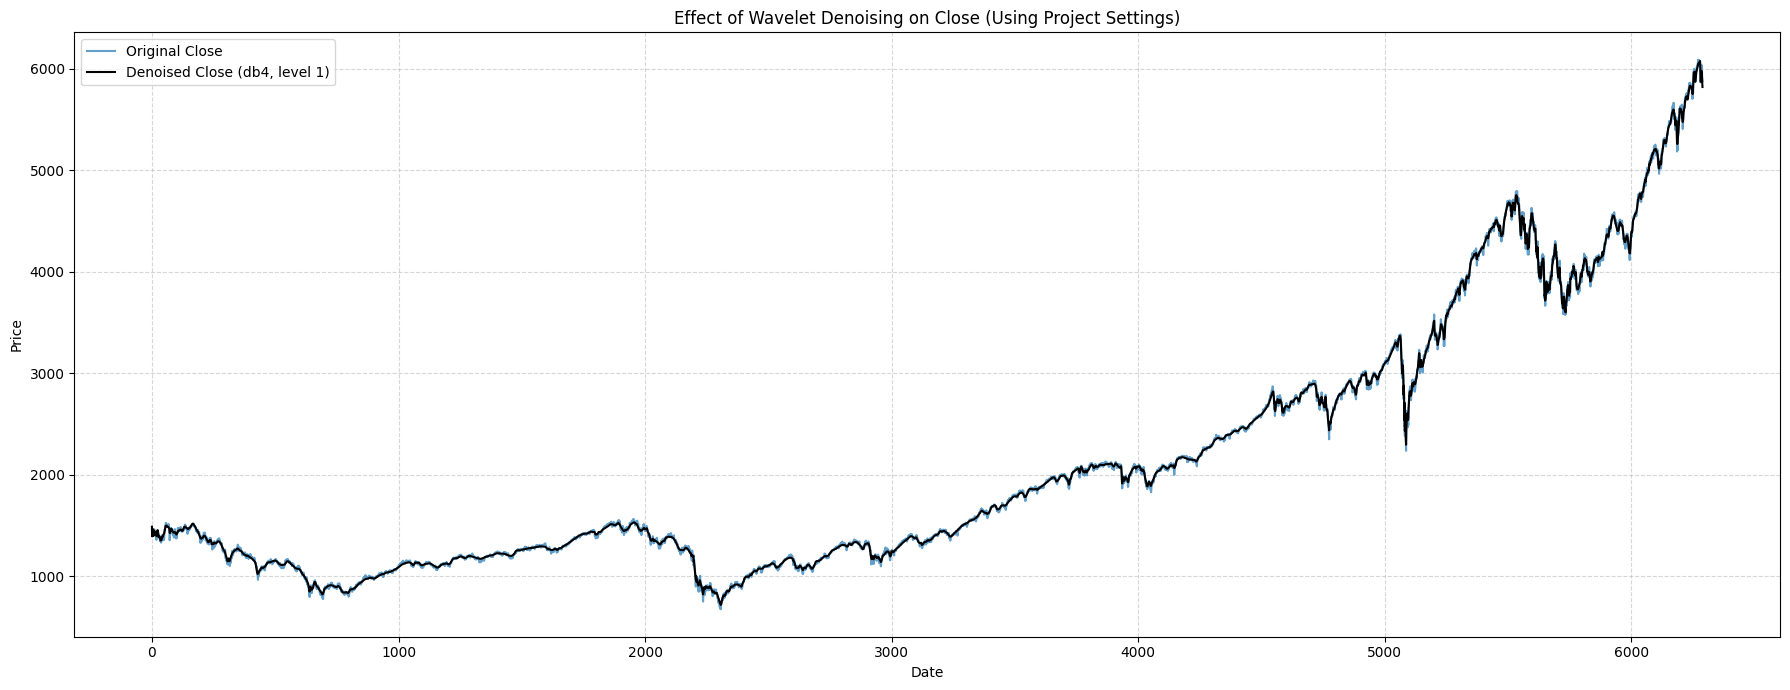


Original 'Volume' series length: 6289
Applying wavelet_denoise with wavelet='db4', level=1 to 'Volume'...
Denoised 'Volume' series length: 6289


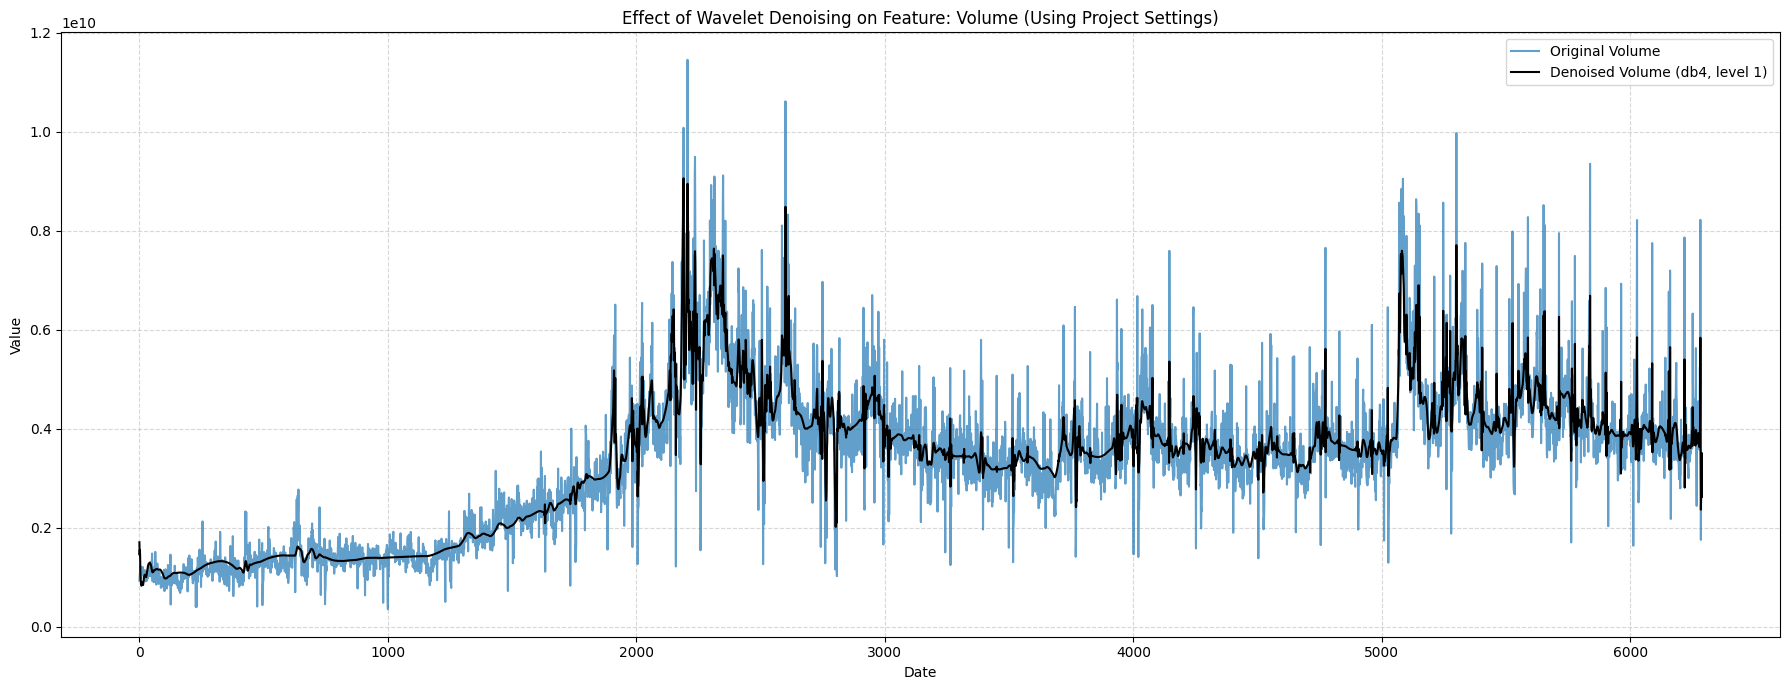

"\n\n**Explanation of the new Python cell:**\n\n1.  **Imports:** It imports necessary libraries.\n2.  **Path Setup:** It attempts to add your `scripts` directory to `sys.path`. This is crucial for the `from data_loader import load_data` and other project-specific imports to work correctly, assuming your notebook (`f.ipynb`) is in the root directory of your project (`predictsp500 - Copy`).\n3.  **Project Imports:** It imports `load_data` from your `scripts.data_loader`, `wavelet_denoise` from `scripts.preprocess`, and `TARGET_COL`, `FEATURES` from `scripts.config`.\n4.  **Load Data:** It calls `load_data()` to get the actual DataFrame as defined in your project.\n5.  **Select Original Series:** It takes a copy of the `TARGET_COL` (e.g., 'Close') from the loaded DataFrame before any denoising.\n6.  **Apply Denoising:** It applies `wavelet_denoise` directly to this original series. The parameters `wavelet='sym8'` and `level=1` are used because these are the defaults specified in your `scr

In [10]:

import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# Ensure the 'scripts' directory is in the Python path
# This allows importing modules like 'data_loader', 'preprocess', 'config'
# Assumes the notebook is in the root directory of the project
module_path = os.path.abspath(os.path.join(os.getcwd(), 'scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")

# Import project-specific functions and configurations
try:
    from data_loader import load_data
    from preprocess import wavelet_denoise # Already imported in a previous cell, but good for explicitness
    from config import TARGET_COL, FEATURES
    print("Successfully imported project modules: load_data, wavelet_denoise, TARGET_COL, FEATURES.")
except ImportError as e:
    print(f"Error importing project modules: {e}")
    print("Please ensure the notebook is in the project's root directory or adjust the module_path.")
    # As a fallback, define TARGET_COL and FEATURES if import fails, though using project config is preferred
    if 'TARGET_COL' not in locals(): TARGET_COL = 'Close'
    if 'FEATURES' not in locals(): FEATURES = ['Open', 'High', 'Low', 'Volume']


# --- Load Real Data using project's load_data function ---
print("\nLoading real data using project's load_data function...")
df_real = load_data() # This function is from your scripts/data_loader.py

if df_real is not None and not df_real.empty:
    print(f"Data loaded successfully. Shape: {df_real.shape}")

    # --- Original Target Series ---
    if TARGET_COL in df_real.columns:
        original_target_series_real = df_real[TARGET_COL].dropna().copy()
        print(f"Original '{TARGET_COL}' series length: {len(original_target_series_real)}")

        # --- Denoised Target Series (using parameters from preprocess.py) ---
        # Your scripts/preprocess.py uses wavelet='sym8', level=1 for features and target.
        wavelet_type_from_preprocess = 'db4'
        level_from_preprocess = 1
        
        print(f"Applying wavelet_denoise with wavelet='{wavelet_type_from_preprocess}', level={level_from_preprocess} to '{TARGET_COL}'...")
        denoised_target_series_real = wavelet_denoise(
            original_target_series_real, 
            wavelet=wavelet_type_from_preprocess, 
            level=level_from_preprocess
        )
        print(f"Denoised '{TARGET_COL}' series length: {len(denoised_target_series_real)}")

        # --- Plotting Before and After Denoising for TARGET_COL ---
        plt.figure(figsize=(18, 7))
        plt.plot(original_target_series_real.index, original_target_series_real, label=f'Original {TARGET_COL}', alpha=0.7)
        plt.plot(denoised_target_series_real.index, denoised_target_series_real, label=f'Denoised {TARGET_COL} ({wavelet_type_from_preprocess}, level {level_from_preprocess})', color='black', linewidth=1.5)
        plt.title(f'Effect of Wavelet Denoising on {TARGET_COL} (Using Project Settings)')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Target column '{TARGET_COL}' not found in the loaded DataFrame.")

    # --- Optional: Plot for one of the FEATURES ---
    if FEATURES and len(FEATURES) > 0:
        sample_feature = FEATURES[3] # Take the first feature as an example
        if sample_feature in df_real.columns:
            original_feature_series_real = df_real[sample_feature].dropna().copy()
            print(f"\nOriginal '{sample_feature}' series length: {len(original_feature_series_real)}")

            print(f"Applying wavelet_denoise with wavelet='{wavelet_type_from_preprocess}', level={level_from_preprocess} to '{sample_feature}'...")
            denoised_feature_series_real = wavelet_denoise(
                original_feature_series_real,
                wavelet=wavelet_type_from_preprocess,
                level=level_from_preprocess
            )
            print(f"Denoised '{sample_feature}' series length: {len(denoised_feature_series_real)}")

            plt.figure(figsize=(18, 7))
            plt.plot(original_feature_series_real.index, original_feature_series_real, label=f'Original {sample_feature}', alpha=0.7)
            plt.plot(denoised_feature_series_real.index, denoised_feature_series_real, label=f'Denoised {sample_feature} ({wavelet_type_from_preprocess}, level {level_from_preprocess})', color='black', linewidth=1.5)
            plt.title(f'Effect of Wavelet Denoising on Feature: {sample_feature} (Using Project Settings)')
            plt.xlabel('Date')
            plt.ylabel('Value')
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Sample feature '{sample_feature}' not found in DataFrame columns.")
    else:
        print("\nNo features defined in FEATURES list to plot, or FEATURES list is empty.")

else:
    print("\nFailed to load real data or DataFrame is empty. Skipping actual data plots.")

'''

**Explanation of the new Python cell:**

1.  **Imports:** It imports necessary libraries.
2.  **Path Setup:** It attempts to add your `scripts` directory to `sys.path`. This is crucial for the `from data_loader import load_data` and other project-specific imports to work correctly, assuming your notebook (`f.ipynb`) is in the root directory of your project (`predictsp500 - Copy`).
3.  **Project Imports:** It imports `load_data` from your `scripts.data_loader`, `wavelet_denoise` from `scripts.preprocess`, and `TARGET_COL`, `FEATURES` from `scripts.config`.
4.  **Load Data:** It calls `load_data()` to get the actual DataFrame as defined in your project.
5.  **Select Original Series:** It takes a copy of the `TARGET_COL` (e.g., 'Close') from the loaded DataFrame before any denoising.
6.  **Apply Denoising:** It applies `wavelet_denoise` directly to this original series. The parameters `wavelet='sym8'` and `level=1` are used because these are the defaults specified in your `scripts/preprocess.py` within the `prepare_data` function.
7.  **Plotting:** It generates a plot showing the original target series and the denoised target series on the same axes for comparison.
8.  **Feature Plot (Optional):** It also includes an optional section to do the same for the first feature listed in your `FEATURES` config, if available.
'''



In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# Ensure the 'scripts' directory is in the Python path
# This allows importing modules like 'data_loader', 'preprocess', 'config'
# Assumes the notebook is in the root directory of the project
module_path = os.path.abspath(os.path.join(os.getcwd(), 'scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)
    print(f"Added '{module_path}' to sys.path")

# Import project-specific functions and configurations
try:
    from data_loader import load_data
    from preprocess import wavelet_denoise # Already imported in a previous cell, but good for explicitness
    from config import TARGET_COL, FEATURES
    print("Successfully imported project modules: load_data, wavelet_denoise, TARGET_COL, FEATURES.")
except ImportError as e:
    print(f"Error importing project modules: {e}")
    print("Please ensure the notebook is in the project's root directory or adjust the module_path.")
    # As a fallback, define TARGET_COL and FEATURES if import fails, though using project config is preferred
    if 'TARGET_COL' not in locals(): TARGET_COL = 'Close'
    if 'FEATURES' not in locals(): FEATURES = ['Open', 'High', 'Low', 'Volume']


# --- Load Real Data using project's load_data function ---
print("\nLoading real data using project's load_data function...")
df_real = load_data() # This function is from your scripts/data_loader.py

if df_real is not None and not df_real.empty:
    print(f"Data loaded successfully. Shape: {df_real.shape}")

    # --- Original Target Series ---
    if TARGET_COL in df_real.columns:
        original_target_series_real = df_real[TARGET_COL].dropna().copy()
        print(f"Original '{TARGET_COL}' series length: {len(original_target_series_real)}")

        # --- Denoised Target Series (using parameters from preprocess.py) ---
        # Your scripts/preprocess.py uses wavelet='sym8', level=1 for features and target.
        wavelet_type_from_preprocess = 'sym8'
        level_from_preprocess = 1
        
        print(f"Applying wavelet_denoise with wavelet='{wavelet_type_from_preprocess}', level={level_from_preprocess} to '{TARGET_COL}'...")
        denoised_target_series_real = wavelet_denoise(
            original_target_series_real, 
            wavelet=wavelet_type_from_preprocess, 
            level=level_from_preprocess
        )
        print(f"Denoised '{TARGET_COL}' series length: {len(denoised_target_series_real)}")

        # --- Plotting Before and After Denoising for TARGET_COL ---
        plt.figure(figsize=(18, 7))
        plt.plot(original_target_series_real.index, original_target_series_real, label=f'Original {TARGET_COL}', alpha=0.7)
        plt.plot(denoised_target_series_real.index, denoised_target_series_real, label=f'Denoised {TARGET_COL} ({wavelet_type_from_preprocess}, level {level_from_preprocess})', color='orange', linewidth=1.5)
        plt.title(f'Effect of Wavelet Denoising on {TARGET_COL} (Using Project Settings)')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Target column '{TARGET_COL}' not found in the loaded DataFrame.")

    # --- Optional: Plot for one of the FEATURES ---
    if FEATURES and len(FEATURES) > 0:
        sample_feature = FEATURES[0] # Take the first feature as an example
        if sample_feature in df_real.columns:
            original_feature_series_real = df_real[sample_feature].dropna().copy()
            print(f"\nOriginal '{sample_feature}' series length: {len(original_feature_series_real)}")

            print(f"Applying wavelet_denoise with wavelet='{wavelet_type_from_preprocess}', level={level_from_preprocess} to '{sample_feature}'...")
            denoised_feature_series_real = wavelet_denoise(
                original_feature_series_real,
                wavelet=wavelet_type_from_preprocess,
                level=level_from_preprocess
            )
            print(f"Denoised '{sample_feature}' series length: {len(denoised_feature_series_real)}")

            plt.figure(figsize=(18, 7))
            plt.plot(original_feature_series_real.index, original_feature_series_real, label=f'Original {sample_feature}', alpha=0.7)
            plt.plot(denoised_feature_series_real.index, denoised_feature_series_real, label=f'Denoised {sample_feature} ({wavelet_type_from_preprocess}, level {level_from_preprocess})', color='green', linewidth=1.5)
            plt.title(f'Effect of Wavelet Denoising on Feature: {sample_feature} (Using Project Settings)')
            plt.xlabel('Date')
            plt.ylabel('Value')
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Sample feature '{sample_feature}' not found in DataFrame columns.")
    else:
        print("\nNo features defined in FEATURES list to plot, or FEATURES list is empty.")

else:
    print("\nFailed to load real data or DataFrame is empty. Skipping actual data plots.")

'''


**Explanation of the new Python cell:**

1.  **Imports:** It imports necessary libraries.
2.  **Path Setup:** It attempts to add your `scripts` directory to `sys.path`. This is crucial for the `from data_loader import load_data` and other project-specific imports to work correctly, assuming your notebook (`f.ipynb`) is in the root directory of your project (`predictsp500 - Copy`).
3.  **Project Imports:** It imports `load_data` from your `scripts.data_loader`, `wavelet_denoise` from `scripts.preprocess`, and `TARGET_COL`, `FEATURES` from `scripts.config`.
4.  **Load Data:** It calls `load_data()` to get the actual DataFrame as defined in your project.
5.  **Select Original Series:** It takes a copy of the `TARGET_COL` (e.g., 'Close') from the loaded DataFrame before any denoising.
6.  **Apply Denoising:** It applies `wavelet_denoise` directly to this original series. The parameters `wavelet='sym8'` and `level=1` are used because these are the defaults specified in your `scripts/preprocess.py` within the `prepare_data` function.
7.  **Plotting:** It generates a plot showing the original target series and the denoised target series on the same axes for comparison.
8.  **Feature Plot (Optional):** It also includes an optional section to do the same for the first feature listed in your `FEATURES` config, if available.

This will give you a direct visualization of how the `wavelet_denoise` function, with the specific parameters used in your project's `prepare_data` pipeline, affects your actual input data.'''